In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Resize window to display all image
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation=inter)

In [16]:
img = cv2.imread('surfacedata/contrastcrop/Nr385.jpg')
# below is from original code
#img1 = cv2.imread('cylinder.png')
#images=np.concatenate(img(img,img1),axis=1)

img_rs = ResizeWithAspectRatio(img, width=1000)
cv2.imshow("Image",img_rs)
cv2.waitKey(0)
cv2.destroyAllWindows()

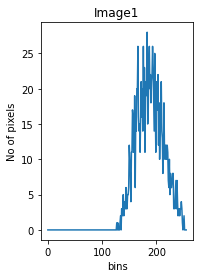

In [17]:
# Convert to Grayscale image
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find histogram of grayscale and display
hist=cv2.calcHist(gray_img,[0],None,[256],[0,256])

plt.subplot(121)
plt.title("Image1")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)
plt.show()

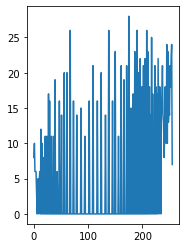

In [18]:
# Normalise brightness and increase contrast
gray_img_eqhist=cv2.equalizeHist(gray_img)

hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])

plt.subplot(121)
plt.plot(hist)
plt.show()

In [19]:
# Display enhanced image
gray_img_eqhistrs = ResizeWithAspectRatio(gray_img_eqhist, width=1000)
cv2.imshow("Enhanced",gray_img_eqhistrs)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
# Using Contrast Limited Adaptive Histogram Equalization (CLAHE) 

clahe=cv2.createCLAHE(clipLimit=40) # 40 is default
gray_img_clahe=clahe.apply(gray_img_eqhist)

imgrs = ResizeWithAspectRatio(gray_img_clahe, width=1000)
cv2.imshow("Images",imgrs)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
# Attempting to separate foreground and background with threshholding
th=80
max_val=255
ret, o1 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_BINARY)
cv2.putText(o1,"Thresh_Binary",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o2 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_BINARY_INV)
cv2.putText(o2,"Thresh_Binary_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o3 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TOZERO)
cv2.putText(o3,"Thresh_Tozero",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o4 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TOZERO_INV)
cv2.putText(o4,"Thresh_Tozero_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o5 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TRUNC)
cv2.putText(o5,"Thresh_trunc",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret ,o6=  cv2.threshold(gray_img_clahe, th, max_val,  cv2.THRESH_OTSU)
cv2.putText(o6,"Thresh_OSTU",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)

final=np.concatenate((o1,o2,o3),axis=1)
final1=np.concatenate((o4,o5,o6),axis=1)

cv2.imwrite("surfaceenhance/thimg1.jpg",final)
cv2.imwrite("surfaceenhance/thimg2.jpg",final1)

True

In [24]:
# Attempt adaptive thresholding to deal with different illumination
thresh1 = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh2 = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
thresh3 = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)
thresh4 = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 4)

final=np.concatenate((thresh1,thresh2,thresh3,thresh4),axis=1)
cv2.imwrite('surfaceenhance/rect.jpg',final)

True